# <font color=green>Auto MPG Data Set</font>

In [51]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
%matplotlib inline

In [3]:
input_path="/Users/sayarsamanta/Documents/GitHub/Data-Science-Projects/Auto MPG Data Set/Data/Input/"
intermediate_path="/Users/sayarsamanta/Documents/GitHub/Data-Science-Projects/Auto MPG Data Set/Data/Intermediate/"
output_path="/Users/sayarsamanta/Documents/GitHub/Data-Science-Projects/Auto MPG Data Set/Data /Output/"

In [4]:
data = pd.read_csv(input_path+"auto-mpg.csv")

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
data.shape

(398, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
#checking for null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

/Volumes/Samsung_T5/Anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

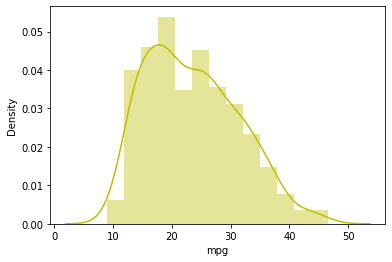

In [10]:
#checking the distribution of predicted variable which is MPG
sns.distplot(data['mpg'],color='y')

In [11]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
data = data[data.horsepower != '?']

In [13]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

<AxesSubplot:xlabel='horsepower'>

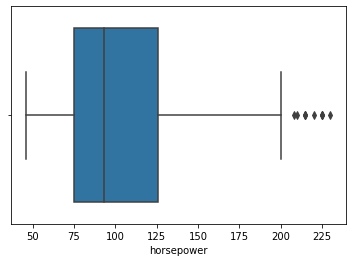

In [14]:
#checking outlier
sns.boxplot(x=data['horsepower'])

In [15]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [16]:
l,u = outlier_treatment(data.horsepower)

In [17]:
data.drop(data[ (data.horsepower > u) | (data.horsepower < l) ].index , inplace=True)

<AxesSubplot:xlabel='horsepower'>

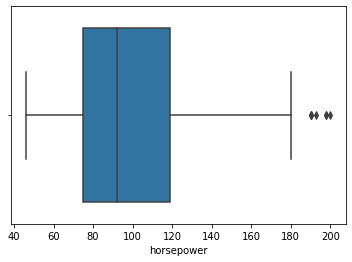

In [18]:
#checking outlier
sns.boxplot(x=data['horsepower'])

<AxesSubplot:xlabel='cylinders'>

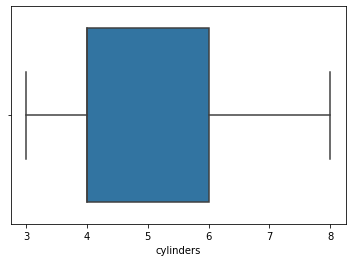

In [19]:
#checking outlier
sns.boxplot(x=data['cylinders'])

<AxesSubplot:xlabel='displacement'>

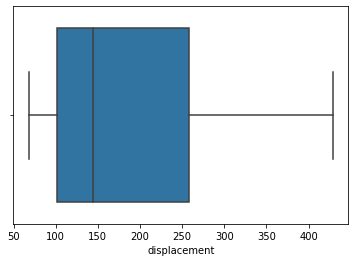

In [20]:
#checking outlier
sns.boxplot(x=data['displacement'])

<AxesSubplot:xlabel='weight'>

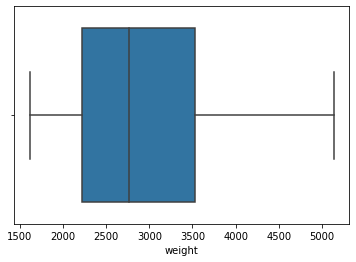

In [21]:
#checking outlier
sns.boxplot(x=data['weight'])

<AxesSubplot:xlabel='acceleration'>

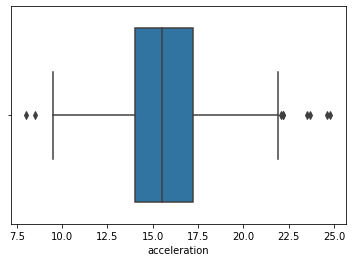

In [22]:
#checking outlier
sns.boxplot(x=data['acceleration'])

In [23]:
l,u = outlier_treatment(data.acceleration)

In [24]:
data.drop(data[ (data.acceleration > u) | (data.acceleration < l) ].index , inplace=True)

<AxesSubplot:xlabel='acceleration'>

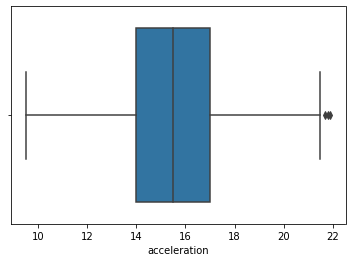

In [25]:
#checking outlier
sns.boxplot(x=data['acceleration'])

<AxesSubplot:xlabel='origin'>

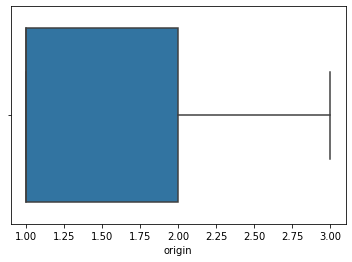

In [26]:
#checking outlier
sns.boxplot(x=data['origin'])

<AxesSubplot:xlabel='model year'>

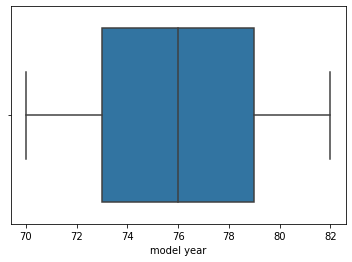

In [27]:
#checking outlier
sns.boxplot(x=data['model year'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           373 non-null    float64
 1   cylinders     373 non-null    int64  
 2   displacement  373 non-null    float64
 3   horsepower    373 non-null    int64  
 4   weight        373 non-null    int64  
 5   acceleration  373 non-null    float64
 6   model year    373 non-null    int64  
 7   origin        373 non-null    int64  
 8   car name      373 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 29.1+ KB


In [29]:
data["cylinders"].value_counts() / len(data)

4    0.517426
8    0.241287
6    0.222520
3    0.010724
5    0.008043
Name: cylinders, dtype: float64

In [30]:
data['origin'].value_counts()

1    230
3     79
2     64
Name: origin, dtype: int64

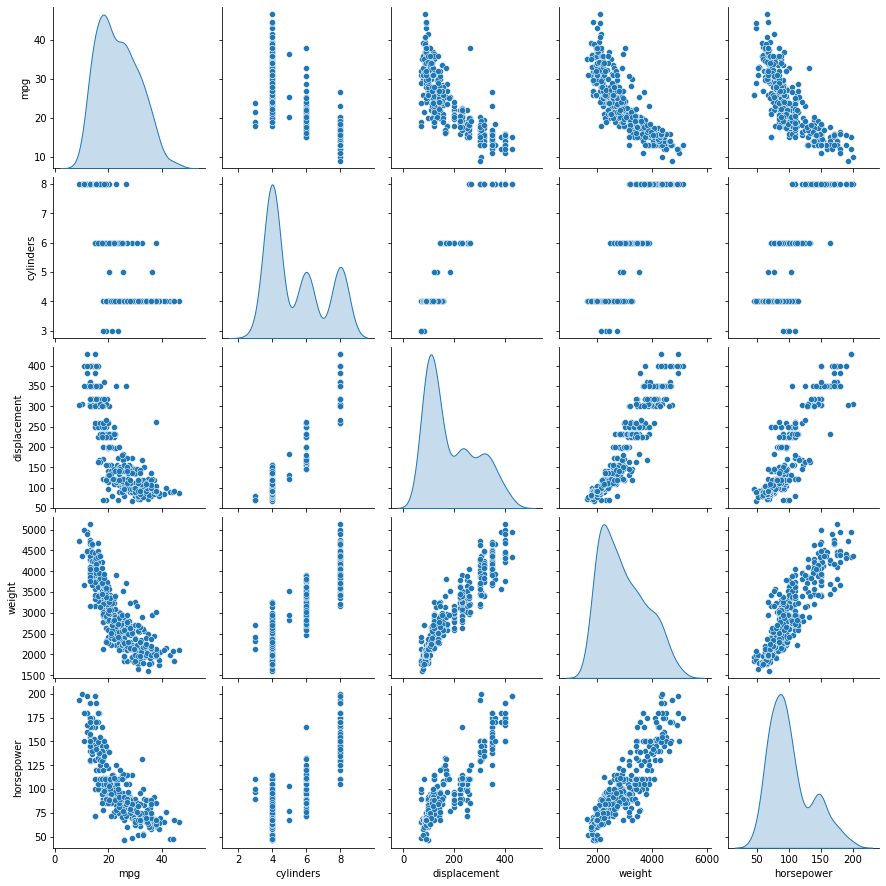

In [31]:
sns.pairplot(data[["mpg", "cylinders", "displacement", "weight", "horsepower"]], diag_kind="kde")

In [32]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [33]:
data_scale = data.copy()

In [34]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [35]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,8,0.662050,0.545455,0.536150,0.201613,70,1,chevrolet chevelle malibu
1,0.159574,8,0.781163,0.772727,0.589736,0.161290,70,1,buick skylark 320
2,0.239362,8,0.692521,0.675325,0.516870,0.120968,70,1,plymouth satellite
3,0.186170,8,0.653740,0.675325,0.516019,0.201613,70,1,amc rebel sst
4,0.212766,8,0.648199,0.610390,0.520556,0.080645,70,1,ford torino


In [36]:
data['country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [37]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country_code
0,0.239362,8,0.662050,0.545455,0.536150,0.201613,70,1,chevrolet chevelle malibu,USA
1,0.159574,8,0.781163,0.772727,0.589736,0.161290,70,1,buick skylark 320,USA
2,0.239362,8,0.692521,0.675325,0.516870,0.120968,70,1,plymouth satellite,USA
3,0.186170,8,0.653740,0.675325,0.516019,0.201613,70,1,amc rebel sst,USA
4,0.212766,8,0.648199,0.610390,0.520556,0.080645,70,1,ford torino,USA


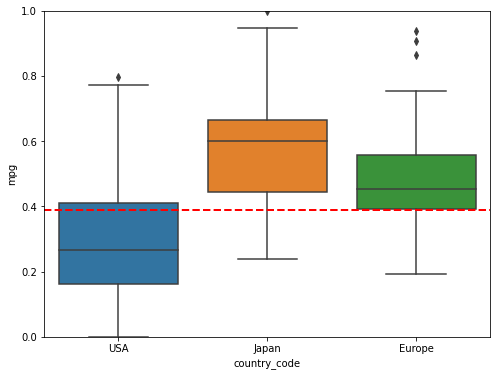

In [38]:
#Lets look at MPG's relation to categories
var = 'country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

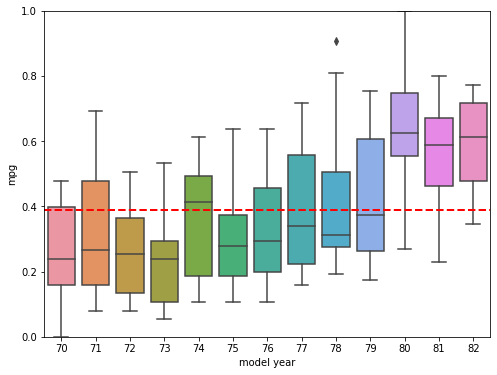

In [39]:
#Let's look at the year wise distribution of MPG
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

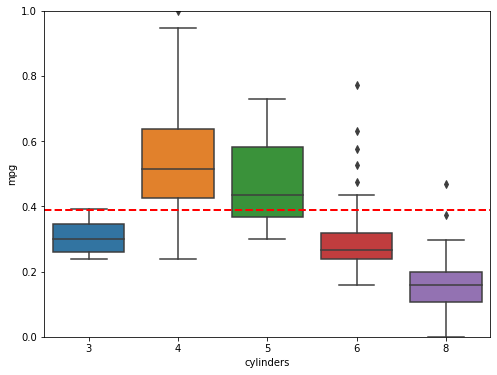

In [40]:
#MPG distribution for cylinders
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

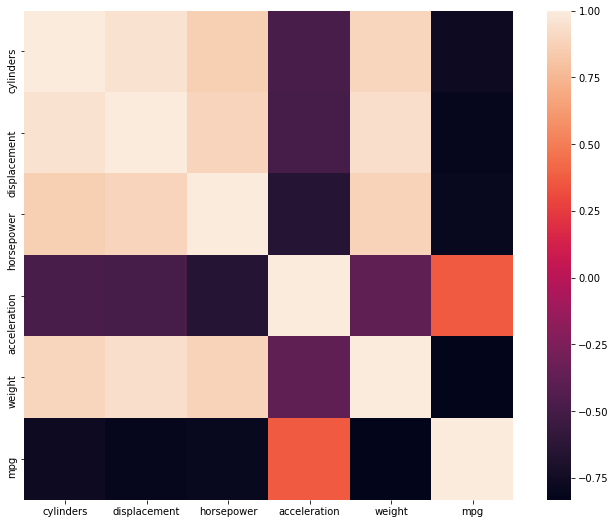

In [41]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [42]:
data["car name"].value_counts()

amc matador           5
ford pinto            5
toyota corolla        5
ford maverick         4
amc gremlin           4
                     ..
mercury zephyr        1
honda civic (auto)    1
dodge monaco (sw)     1
mercury capri 2000    1
chevy c20             1
Name: car name, Length: 289, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           373 non-null    float64
 1   cylinders     373 non-null    int64  
 2   displacement  373 non-null    float64
 3   horsepower    373 non-null    int64  
 4   weight        373 non-null    int64  
 5   acceleration  373 non-null    float64
 6   model year    373 non-null    int64  
 7   origin        373 non-null    int64  
 8   car name      373 non-null    object 
 9   country_code  373 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 40.2+ KB


In [44]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country_code
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,USA


In [45]:
def preprocess(data):
    data['country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
    data['company name']=[i[0] for i in data['car name'].str.split(' ')]
    data['company name']=data['company name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
    data['company name']=data['company name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
    data['company name']=data['company name'].replace('maxda','mazda')
    data['company name']=data['company name'].replace('toyouta','toyota')
    data['company name']=data['company name'].replace('mercedes','mercedes-benz')
    data['company name']=data['company name'].replace('nissan','datsun')
    data['company name']=data['company name'].replace('capri','ford')
    return data;

In [93]:
def final_model(data,model):
    if type(data) == dict:
        df = pd.DataFrame(data)
    else:
        df = data
        
    data_process = preprocess(df);
    factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
    X = pd.DataFrame(data_process[factors].copy())
    X = StandardScaler().fit_transform(X)
    y_pred = model.predict(X);
    return y_pred;
    

In [46]:
preprocess(data);

In [48]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country_code,company name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,USA,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,USA,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,USA,ford


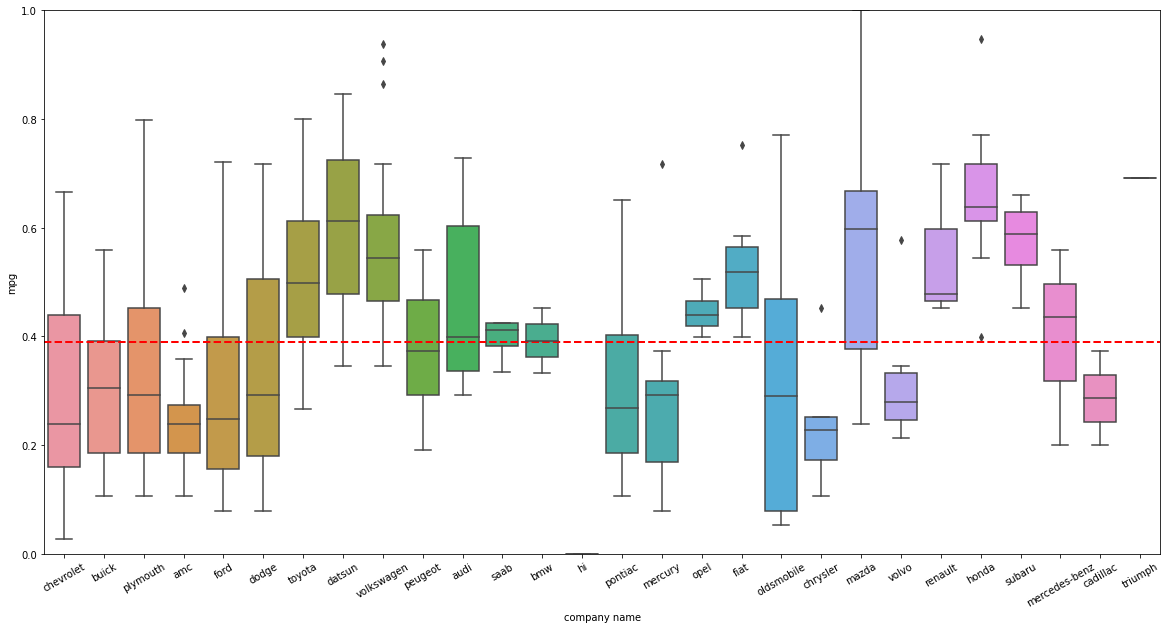

In [154]:
var = 'company name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

/Volumes/Samsung_T5/Anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


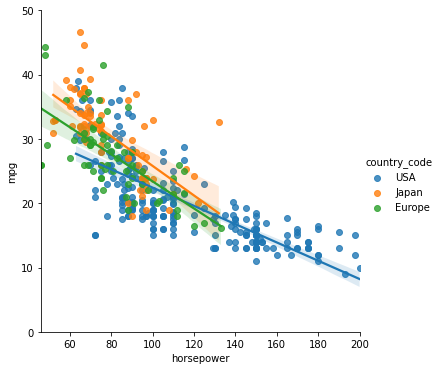

In [155]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

/Volumes/Samsung_T5/Anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


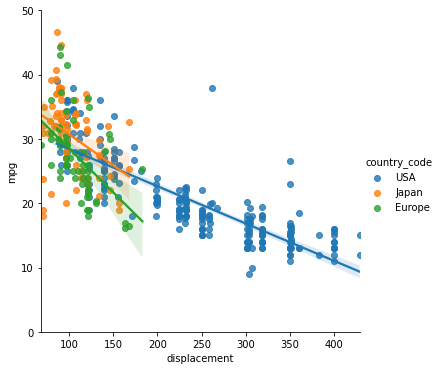

In [156]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

/Volumes/Samsung_T5/Anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


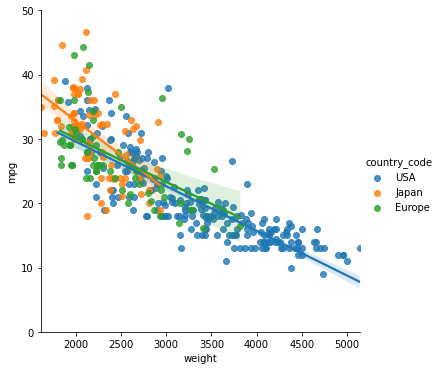

In [157]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

/Volumes/Samsung_T5/Anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


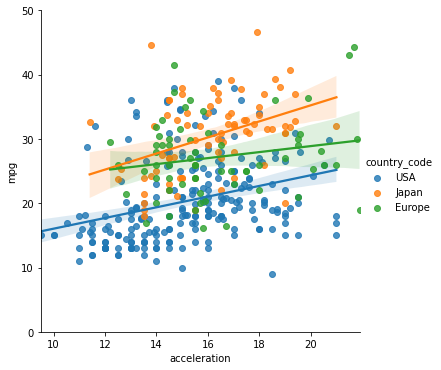

In [158]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

In [49]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

In [52]:
X = StandardScaler().fit_transform(X)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)

In [54]:
regressor = LinearRegression()
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [55]:
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
y_predicted = regressor.predict(X_test)

In [57]:
y_predicted

array([28.11478665, 21.76975317, 19.68033014, 23.74220549, 24.0954267 ,
       20.7127364 , 25.4262861 , 17.06673625, 18.17752337, 14.28460903,
       21.3712062 , 26.90128299, 15.5526166 , 31.53713964, 26.86634388,
       27.15751655, 26.13547194, 23.05463045, 23.31140393, 14.82611478,
       29.96950259, 18.59115728, 22.1165439 , 17.8622079 , 20.50353364,
        6.55467685, 22.12567742, 18.43501779, 30.62534928, 25.30360342,
       28.01680777, 26.07104798, 23.3816859 , 22.51977304, 27.94049636,
       16.81387641, 12.33800994, 25.72396552, 19.57524495, 34.30263595,
       31.05134248, 24.61217864, 26.72607073, 29.87057274, 19.79385892,
       23.00932482, 11.62554526, 27.76863229, 24.37209826, 21.37605468,
       20.62333116, 31.47610647, 24.25267428, 30.231944  , 25.06321981,
       24.54080449, 19.38361515, 25.72109573, 23.31795189, 25.55226974,
       15.69350251, 19.79206548, 27.42562622, 16.45692576, 21.12571678,
       25.5375407 , 32.85541193, 14.95073207, 16.10534231, 28.06

In [58]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.416758638032858

In [59]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=4000)

In [60]:
gb_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [61]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [62]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

3.2000248502523956

<AxesSubplot:>

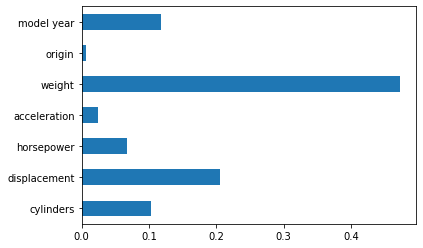

In [63]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [65]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [66]:
explained_variance = pca.explained_variance_ratio_

In [67]:
explained_variance

array([0.60608109, 0.15494084])

In [68]:
regressor = LinearRegression()
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [69]:
regressor.fit(X_train_pca,y_train)

LinearRegression()

In [70]:
y_pred_pca = regressor.predict(X_test_pca)

In [71]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.416758638032858

In [72]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)

In [73]:
grid = grid.fit(X_train, y_train)

In [74]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=45)

In [75]:
gb_regressor_t = grid.best_estimator_

In [76]:
gb_regressor_t.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=45)

In [77]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)

In [78]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

3.1227703387076917

In [96]:
vehicle_config = {
    'cylinders': [4, 6, 8],
    'displacement': [155.0, 160.0, 165.5],
    'horsepower': [93.0, 130.0, 98.0],
    'weight': [2500.0, 3150.0, 2600.0],
    'acceleration': [15.0, 14.0, 16.0],
    'model year': [81, 80, 78],
    'origin': [3, 2, 1],
    'car name': ['ford torino', 'buick skylark 320', 'amc rebel sst']
}

In [97]:
final_model(vehicle_config,gb_regressor_t)

array([26.8255357 , 18.25396508, 22.20997203])

In [99]:
import pickle

##dump the model into a file
with open("model.bin", 'wb') as f_out:
    pickle.dump(gb_regressor_t, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

In [100]:
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

In [2]:
vehicle_config = {
    'cylinders': [1, 3, 5],
    'displacement': [165.0, 180.0, 135.5],
    'horsepower': [90.0, 140.0, 100.0],
    'weight': [3500.0, 2150.0, 2900.0],
    'acceleration': [17.0, 17.0, 11.0],
    'model year': [71, 60, 70],
    'origin': [1, 2, 3],
    'car name': ['ford torino', 'buick skylark 320', 'amc rebel sst']
}

In [102]:
final_model(vehicle_config,model)

array([18.57381429, 22.1934439 , 24.74219973])

In [3]:
import requests

url = "https://fule-price-predictions.herokuapp.com/"
r = requests.post(url, json = vehicle_config)
r.text.strip()

'{"fuelPrice_prediction":[18.573814290343883,22.19344389928078,24.742199725529243]}'